In [25]:
import matplotlib.pyplot as plt
import os
import codecs
plt.style.use('ggplot')

In [22]:
points = []
adj = []
with codecs.open('c2.txt', 'r', encoding='utf-8') as fin:
    n = int(fin.readline())
    print(n)
    for i in range(n):
        name, num, param, x, y = [t(s) for t,s in zip((str, int, float, float, float), fin.readline().split())]
        points.append({
            'name': name,
            'id': num,
            'param': param,
            'x': x,
            'y': y
        })
    res = fin.read().split()
    adj = [divmod(x, n) for x in range(len(res)) if int(res[x])==1]

269


In [29]:
import numpy as np
def discretize(data, bins):
    split = np.array_split(np.sort(data), bins)
    cutoffs = [x[-1] for x in split]
    cutoffs = cutoffs[:-1]
    discrete = np.digitize(data, cutoffs, right=True)
    return discrete, cutoffs

In [38]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

269


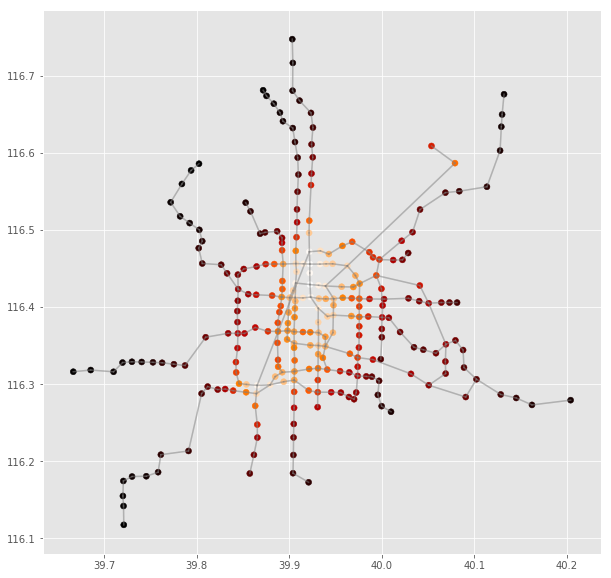

In [59]:
%matplotlib inline
plt.figure(figsize=(10,10))
x = [point['x'] for point in points]
y = [point['y'] for point in points]
c,_ = discretize([point['param'] for point in points], 255)
print(len(c))
plt.scatter(x, y, c=c, cmap = 'gist_heat')
for fr, to in adj:
    p1 = [(point['x'], point['y']) for point in points if point['id']==fr + 1]
    p2 = [(point['x'], point['y']) for point in points if point['id']==to + 1]
    plt.plot([p1[0][0], p2[0][0]], [p1[0][1],p2[0][1]], color='grey', alpha=0.3)
    
plt.show()